In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
import IPython.display as ipd

### Label Analysis

In [2]:
labels = pd.read_csv('DHD_dataset/labels.csv')

In [3]:
label_counts = labels['label'].value_counts()
class_distribution = labels['label'].value_counts()

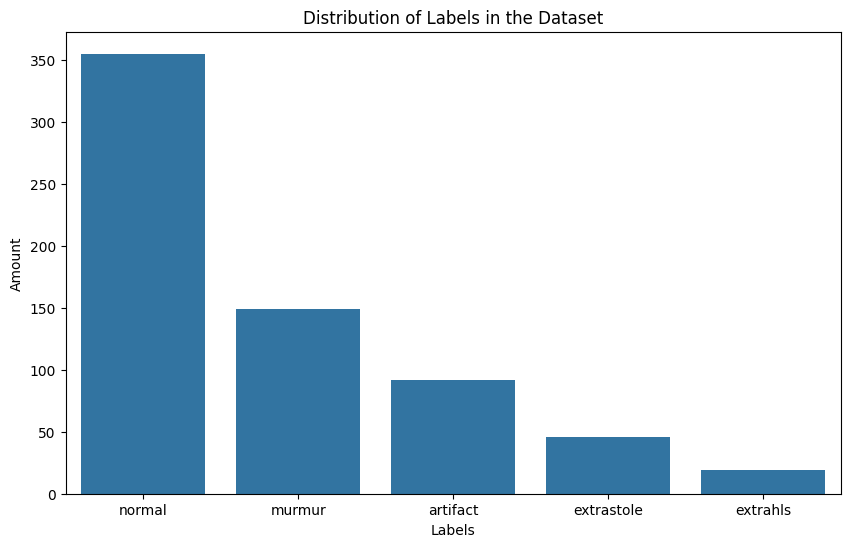

In [4]:
plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title('Distribution of Labels in the Dataset')
plt.xlabel('Labels')
plt.ylabel('Amount')
plt.show()

In [5]:
# Listen to samples from each class
for label in class_distribution.index:
    sample_file = labels[labels['label'] == label]['filename'].values[0]
    print(f'Class: {label}')
    filename = 'DHD_dataset/audio/' + sample_file
    audio, sample_rate = librosa.load(filename, sr=None)
    ipd.display(ipd.Audio(audio, rate=sample_rate))

Class: normal


Class: murmur


Class: artifact


Class: extrastole


Class: extrahls


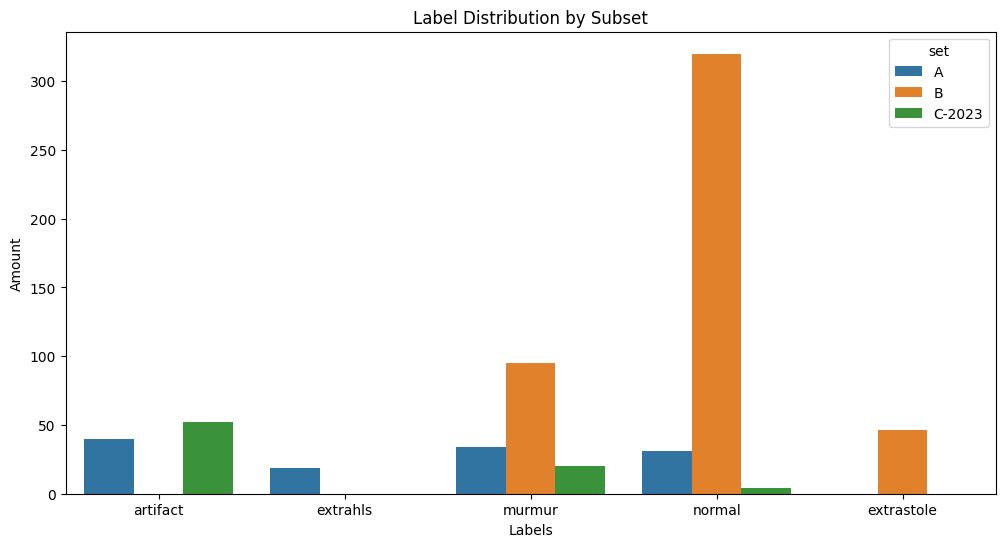

In [6]:
plt.figure(figsize=(12, 6))
sns.countplot(data=labels, x='label', hue='set')
plt.title('Label Distribution by Subset')
plt.xlabel('Labels')
plt.ylabel('Amount')
plt.show()

Class: normal


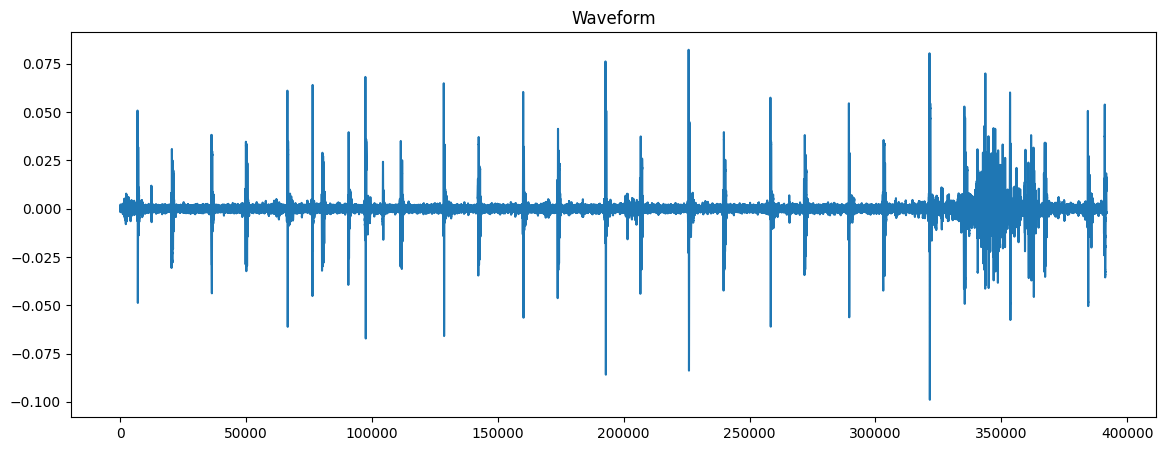

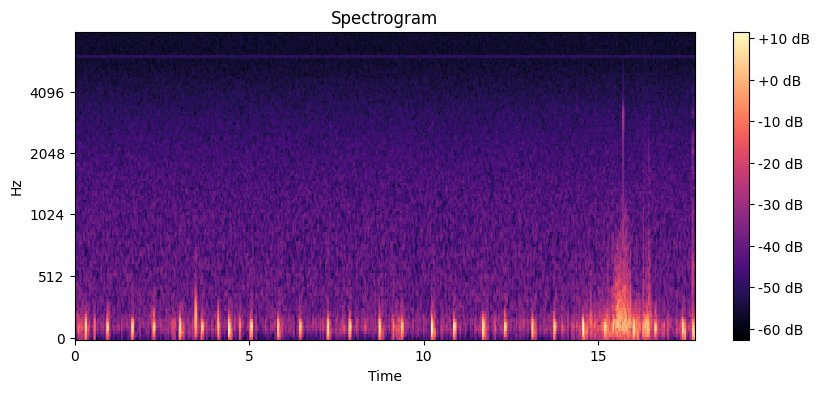

Class: murmur


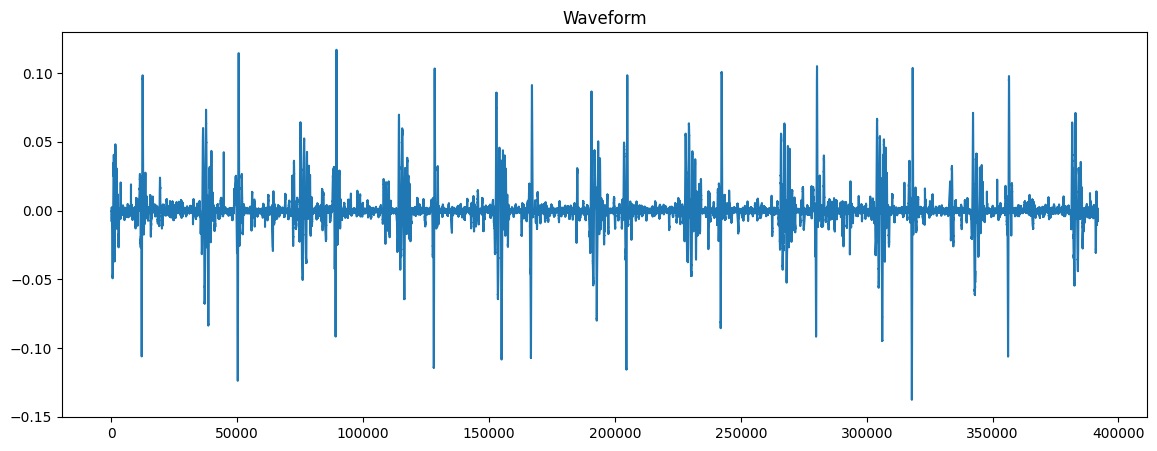

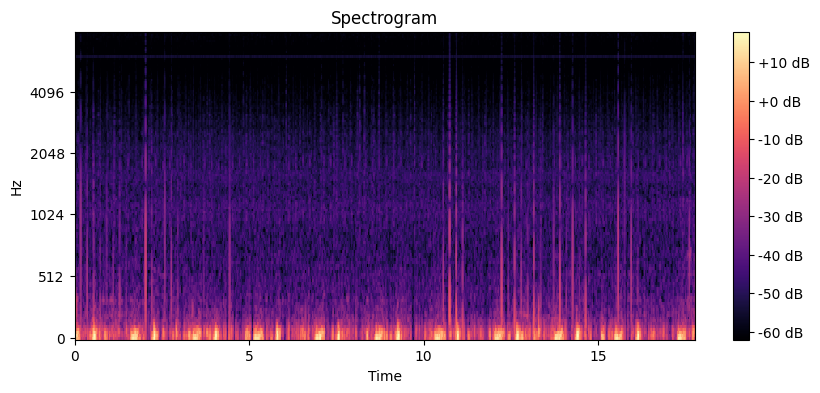

Class: artifact


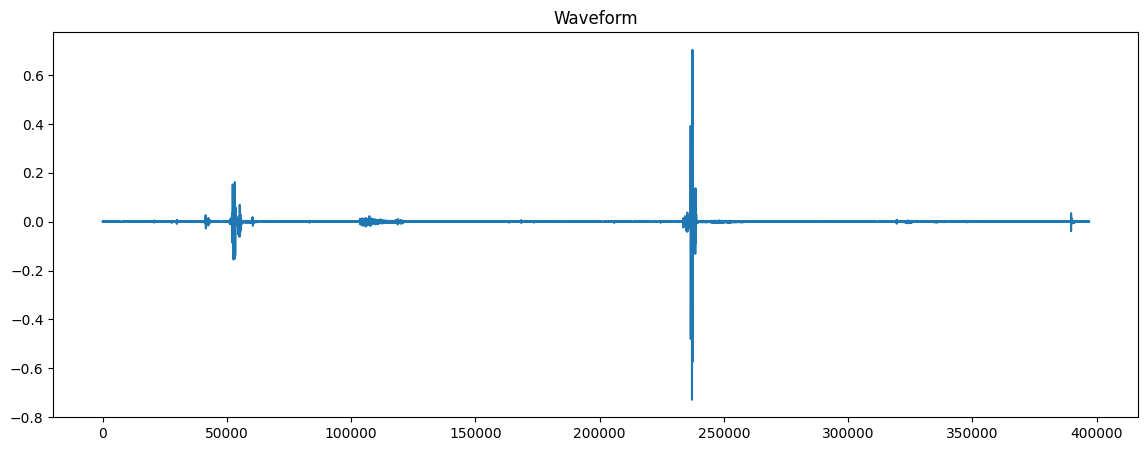

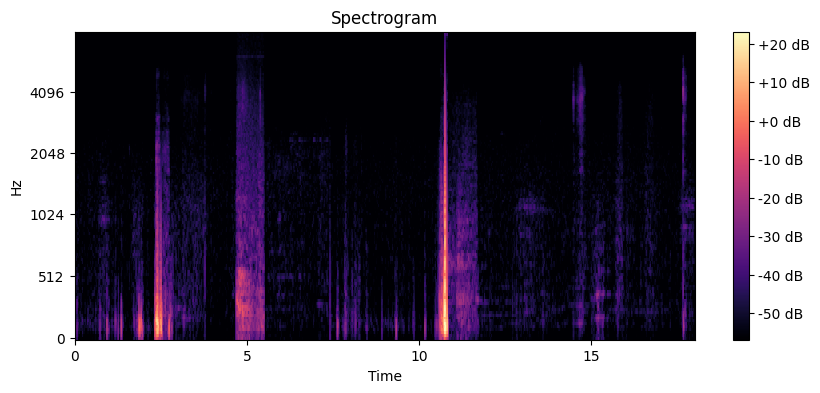

Class: extrastole


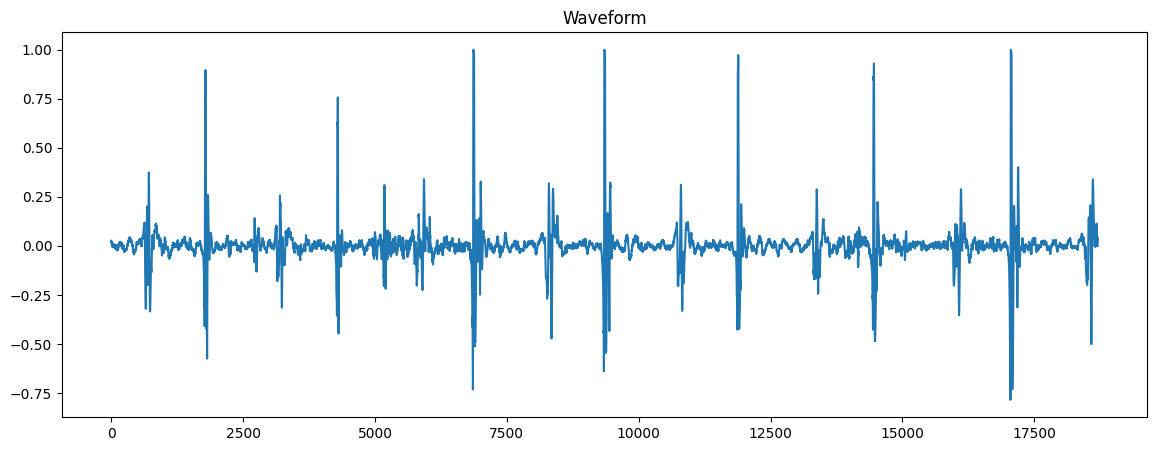

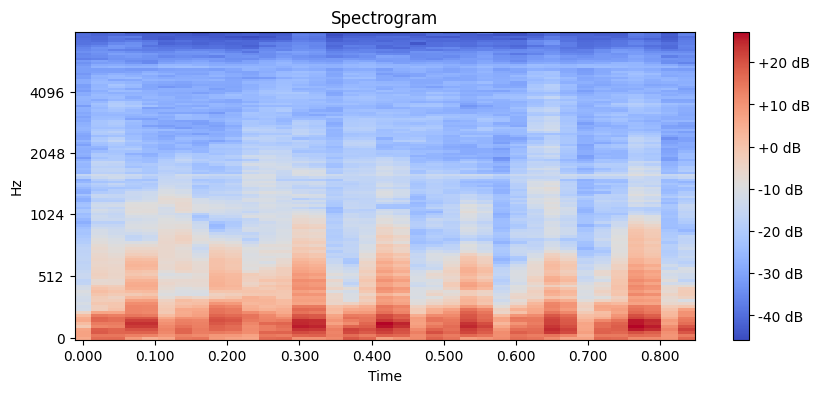

Class: extrahls


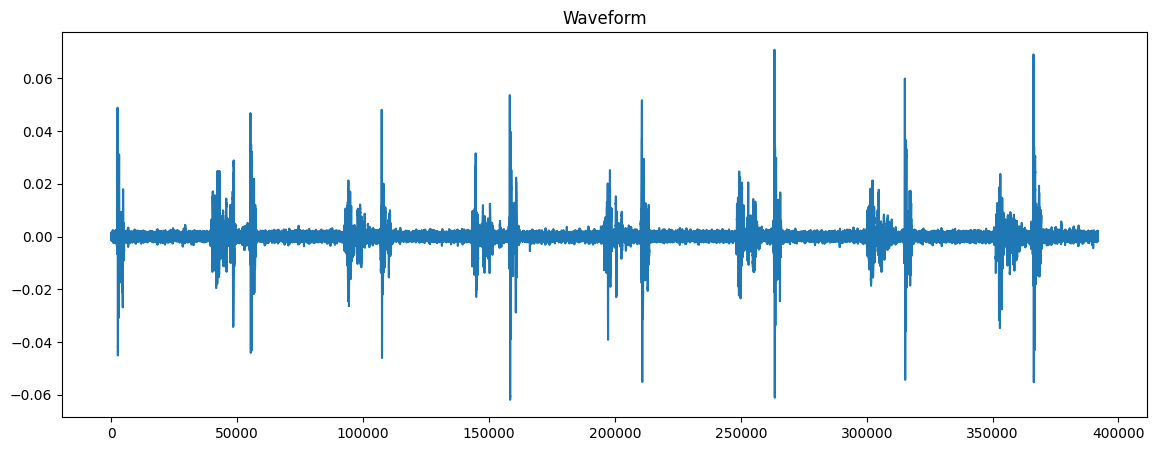

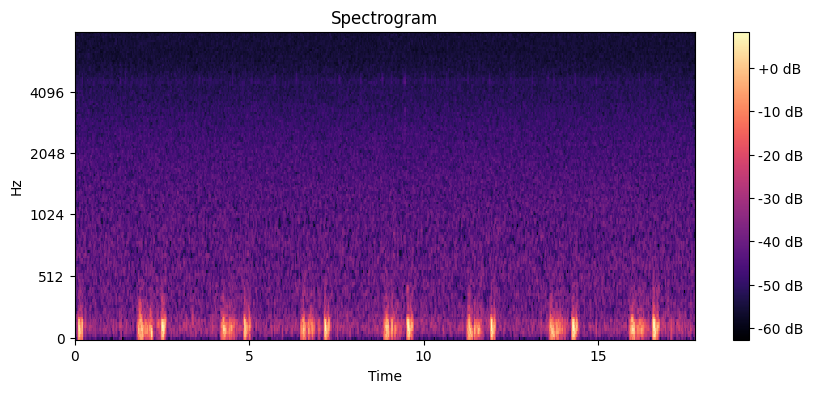

In [7]:
# Visualize the audio files
for label in class_distribution.index:
    sample_file = labels[labels['label'] == label]['filename'].values[0]
    print(f'Class: {label}')
    filename = 'DHD_dataset/audio/' + sample_file
    audio, sample_rate = librosa.load(filename, sr=None)
    
    # Plot the waveform
    plt.figure(figsize=(14, 5))
    plt.plot(audio)
    plt.title('Waveform')
    plt.show()
    
    # Generate and display a spectrogram
    spectrogram = librosa.feature.melspectrogram(y=audio, sr=sample_rate)
    spectrogram = librosa.power_to_db(spectrogram)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time')
    plt.title('Spectrogram')
    plt.colorbar(format='%+2.0f dB')
    plt.show()

### Analsiis de los Audios

In [8]:
def audio_duration(filename):
    y, sr = librosa.load(filename, sr=None)
    return librosa.get_duration(y=y, sr=sr)

In [9]:
labels['duration'] = labels['filename'].apply(lambda x: audio_duration(f'DHD_dataset/audio/{x}'))

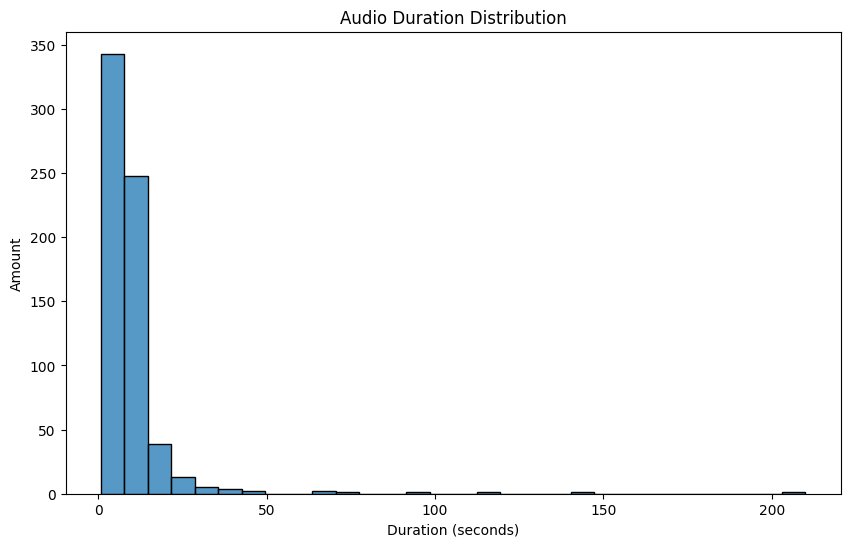

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(labels['duration'], bins=30)
plt.title('Audio Duration Distribution')
plt.xlabel('Duration (seconds)')
plt.ylabel('Amount')
plt.show()

### Analisis Estadistico

In [11]:
def extract_mfcc(file_path):
    try:
        audio, sample_rate = librosa.load(file_path, sr=None)
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=13)
        return mfccs.mean(axis=1)
    except Exception as e:
        print(f"Error encountered while parsing file: {file_path}", e)
        return None

In [12]:
mfcc_features = []

for _, row in labels.iterrows():
    file_path = f'DHD_dataset/audio/{row["filename"]}'
    mfccs = extract_mfcc(file_path)
    
    if mfccs is not None:
        mfcc_features.append(mfccs)

In [13]:
mfcc_df = pd.DataFrame(mfcc_features, columns=[f'MFCC_{i}' for i in range(13)])

In [14]:
mfcc_df.head()

MFCC_0      MFCC_1     MFCC_2     MFCC_3     MFCC_4     MFCC_5  \
0 -599.938965   33.781048   7.354343   4.549446   2.182475   2.713721   
1 -752.226074   23.831125   8.511930 -12.289287   6.590365 -13.384442   
2 -587.105286   56.313488 -21.251680   5.092138 -13.107714  -3.194034   
3 -349.670349  141.826355 -21.676260  23.579344  -2.894292  -3.926399   
4 -333.936340  115.904953  -7.575936   5.685023   1.280251  -1.137761   

     MFCC_6     MFCC_7    MFCC_8     MFCC_9   MFCC_10   MFCC_11   MFCC_12  
0  0.709751  -0.581391 -1.210531  -2.770298 -1.950883 -1.373694 -1.622825  
1  8.085061 -10.728705  8.733045  -9.553116  3.778762 -4.386584 -2.240948  
2 -3.268596  -9.355012  3.239805  -8.664277  1.979159 -5.955956 -1.586634  
3 -8.095815  -8.885119 -7.692841  -5.413455 -5.656429 -9.260781 -6.814068  
4  2.269085  -7.837833 -2.776604 -10.693048 -0.809351 -7.148301 -5.479276

In [15]:
mfcc_df.describe()

MFCC_0      MFCC_1      MFCC_2      MFCC_3      MFCC_4  \
count   661.000000  661.000000  661.000000  661.000000  661.000000   
mean   -255.168304  122.963242   15.686279   32.723701    6.388992   
std     157.374100   34.920063   22.708284   13.882003   13.772099   
min   -1131.370972  -52.603596  -95.488274  -29.505058  -52.291615   
25%    -354.692902  105.891266    4.475073   26.278067   -2.278414   
50%    -202.615326  129.191010   18.678968   34.383305    6.026441   
75%    -162.163025  147.034027   28.134291   41.539326   13.026370   
max      73.752220  231.294983   91.860329   75.583107   58.020161   

           MFCC_5      MFCC_6      MFCC_7      MFCC_8      MFCC_9     MFCC_10  \
count  661.000000  661.000000  661.000000  661.000000  661.000000  661.000000   
mean    20.212141    0.859042    9.907257    0.302630    6.242021   -0.722611   
std     11.711412   10.087699    8.185313    8.040575    7.090021    6.923782   
min    -25.779781  -29.991201  -35.734516  -38.580845  -36.203712  -47.653233   
25%     15.013864   -5.263840    7.161769   -3.527355    3.487469   -3.193653   
50%     22.496584   -0.841638   11.127224   -0.192289    7.132913   -0.568015   
75%     28.377899    4.559114   14.591898    3.691282   10.029043    2.106850   
max     43.436527   32.056953   47.628925   42.476040   39.453510   20.987400   

          MFCC_11     MFCC_12  
count  661.000000  661.000000  
mean     1.996097   -0.649425  
std      5.651581    4.828154  
min    -38.166855  -26.807035  
25%     -0.641062   -2.857314  
50%      1.691530   -0.753950  
75%      4.025897    1.404792  
max     33.899632   22.546854

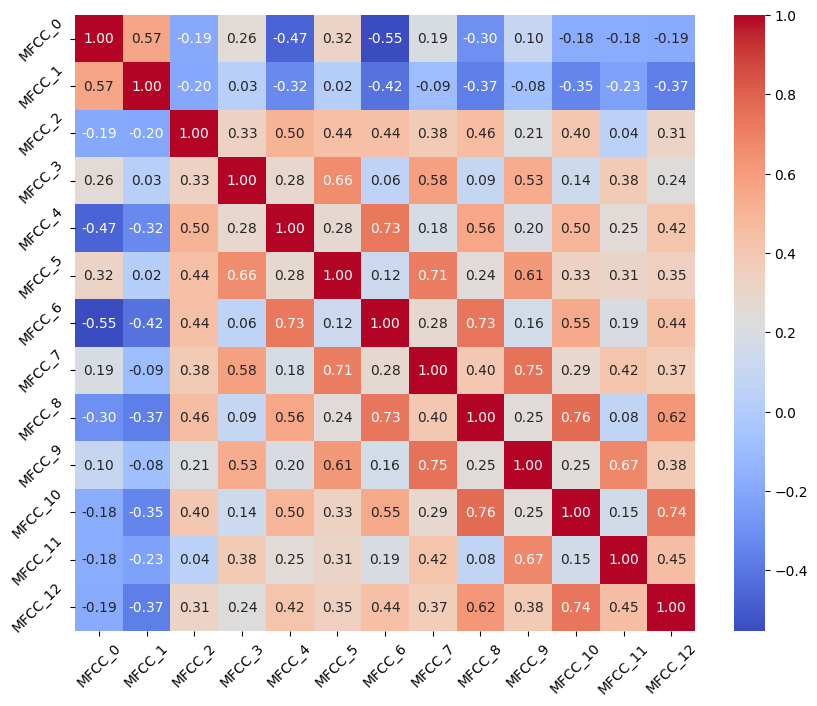

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(mfcc_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

## Procesamiento de la Data

In [17]:
spectrograms = []
label_list = []

fixed_length = 900

for index, row in labels.iterrows():
    filename = 'DHD_dataset/audio/' + row['filename']
    audio, sample_rate = librosa.load(filename, sr=None)

    spectrogram = librosa.feature.melspectrogram(y=audio, sr=sample_rate)
    spectrogram = librosa.power_to_db(spectrogram)

    if spectrogram.shape[1] > fixed_length:
        spectrogram = spectrogram[:, :fixed_length]
    else:
        padding = fixed_length - spectrogram.shape[1]
        spectrogram = np.pad(spectrogram, ((0, 0), (0, padding)), 'constant')

    spectrograms.append(spectrogram)
    label_list.append(row['label'])

In [18]:
spectrograms = np.array(spectrograms)
label_list = np.array(label_list)

In [19]:
# Print the shape of the spectrograms array
print("Shape of spectrograms:", spectrograms.shape)

# Print the shape of the label list
print("Shape of label list:", label_list.shape)

Shape of spectrograms: (661, 128, 900)
Shape of label list: (661,)


## Dataset

In [20]:
import torch
from torch.utils.data import Dataset

class AudioDataset(Dataset):
    def __init__(self, spectrograms, labels):
        """
        spectrograms: Array de numpy que contiene los espectrogramas
        labels: Array de numpy que contiene las etiquetas
        """
        self.spectrograms = spectrograms
        self.labels = labels

    def __len__(self):
        return len(self.spectrograms)

    def __getitem__(self, idx):
        spectrogram = self.spectrograms[idx]
        
        # Add a dimention to a channel
        spectrogram = np.expand_dims(spectrogram, axis=0)

        label = self.labels[idx]

        spectrogram_tensor = torch.tensor(spectrogram, dtype=torch.float32)
        label_tensor = torch.tensor(label, dtype=torch.long)

        return spectrogram_tensor, label_tensor

In [21]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(label_list)
original_labels = label_encoder.inverse_transform(encoded_labels)

In [22]:
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(spectrograms, encoded_labels, test_size=0.2, stratify=encoded_labels, random_state=42)

# Further split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

# Create TensorDatasets for train, validation, and test data
train_dataset = TensorDataset(torch.tensor(X_train), torch.tensor(y_train))
valid_dataset = TensorDataset(torch.tensor(X_val), torch.tensor(y_val))
test_dataset = TensorDataset(torch.tensor(X_test), torch.tensor(y_test))

# Create DataLoader objects
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Print the shapes of the datasets to check
print(f'Training set: {len(train_loader.dataset)} samples')
print(f'Validation set: {len(val_loader.dataset)} samples')
print(f'Test set: {len(test_loader.dataset)} samples')

Training set: 422 samples
Validation set: 106 samples
Test set: 133 samples


In [23]:
batch_data, batch_labels = next(iter(train_loader))

print("Size dataloader:", batch_data.size())
print("Size labels:", batch_labels.size())

Size dataloader: torch.Size([32, 128, 900])
Size labels: torch.Size([32])


## Model

In [24]:
import torch
import torch.nn as nn
import torch.optim as optim

In [25]:
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        
        self.conv3 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        
        self.fc1 = nn.Linear(64 * 16 * 112, 64)
        self.dropout = nn.Dropout(0.5)
        
        self.fc2 = nn.Linear(64, 5)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 64 * 16 * 112)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

In [26]:
model = CNN()

In [27]:
from torchsummary import summary
summary(model, (1, 128, 900))

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 32, 128, 900]        320
├─MaxPool2d: 1-2                         [-1, 32, 64, 450]         --
├─Conv2d: 1-3                            [-1, 64, 64, 450]         18,496
├─MaxPool2d: 1-4                         [-1, 64, 32, 225]         --
├─Conv2d: 1-5                            [-1, 64, 32, 225]         36,928
├─MaxPool2d: 1-6                         [-1, 64, 16, 112]         --
├─Linear: 1-7                            [-1, 64]                  7,340,096
├─Dropout: 1-8                           [-1, 64]                  --
├─Linear: 1-9                            [-1, 5]                   325
Total params: 7,396,165
Trainable params: 7,396,165
Non-trainable params: 0
Total mult-adds (M): 836.78
Input size (MB): 0.44
Forward/backward pass size (MB): 45.70
Params size (MB): 28.21
Estimated Total Size (MB): 74.36


/home/matcraft/anaconda3/envs/math/lib/python3.10/site-packages/torch/nn/modules/conv.py:456: UserWarning: Applied workaround for CuDNN issue, install nvrtc.so (Triggered internally at /opt/conda/conda-bld/pytorch_1702400366987/work/aten/src/ATen/native/cudnn/Conv_v8.cpp:80.)
  return F.conv2d(input, weight, bias, self.stride,


Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 32, 128, 900]        320
├─MaxPool2d: 1-2                         [-1, 32, 64, 450]         --
├─Conv2d: 1-3                            [-1, 64, 64, 450]         18,496
├─MaxPool2d: 1-4                         [-1, 64, 32, 225]         --
├─Conv2d: 1-5                            [-1, 64, 32, 225]         36,928
├─MaxPool2d: 1-6                         [-1, 64, 16, 112]         --
├─Linear: 1-7                            [-1, 64]                  7,340,096
├─Dropout: 1-8                           [-1, 64]                  --
├─Linear: 1-9                            [-1, 5]                   325
Total params: 7,396,165
Trainable params: 7,396,165
Non-trainable params: 0
Total mult-adds (M): 836.78
Input size (MB): 0.44
Forward/backward pass size (MB): 45.70
Params size (MB): 28.21
Estimated Total Size (MB): 74.36

In [28]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [29]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

In [30]:
model = model.to(device)

## Training

In [31]:
# Params
num_epochs = 20

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Training
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        inputs = inputs.unsqueeze(1)

        # Move to device
        inputs, labels = inputs.to(device), labels.to(device)

        # Clean grads
        optimizer.zero_grad()

        # Backward
        outputs = model(inputs)

        # Calculate loss
        loss = criterion(outputs, labels)

        # backward and opt
        loss.backward()
        optimizer.step()

        # Add loss
        train_loss += loss.item() * inputs.size(0)

        # Cal accuracy
        _, predicted_train = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()

    # Calculate mean loss and mean accuracy
    train_loss = train_loss / len(train_loader.dataset)
    train_accuracy = 100 * correct_train / total_train

    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # Validation
    model.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs = inputs.unsqueeze(1)
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)

            # Calcualte loss
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)

            # calculate accuracy
            _, predicted_val = torch.max(outputs, 1)
            total_val += labels.size(0)
            correct_val += (predicted_val == labels).sum().item()

    # Calculate mena loss and mean accuracy
    val_loss = val_loss / len(val_loader.dataset)
    val_accuracy = 100 * correct_val / total_val

    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    print(f'Epoch {epoch+1}/{num_epochs} - '
          f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}% - '
          f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%')

Epoch 1/20 - Train Loss: 3.8347, Train Accuracy: 54.27% - Validation Loss: 0.9599, Validation Accuracy: 66.98%
Epoch 2/20 - Train Loss: 0.9584, Train Accuracy: 65.88% - Validation Loss: 0.9025, Validation Accuracy: 66.98%
Epoch 3/20 - Train Loss: 0.8746, Train Accuracy: 67.30% - Validation Loss: 0.8968, Validation Accuracy: 66.04%
Epoch 4/20 - Train Loss: 0.8670, Train Accuracy: 68.72% - Validation Loss: 0.9219, Validation Accuracy: 66.98%
Epoch 5/20 - Train Loss: 0.7433, Train Accuracy: 72.27% - Validation Loss: 0.9339, Validation Accuracy: 65.09%
Epoch 6/20 - Train Loss: 0.6746, Train Accuracy: 73.70% - Validation Loss: 0.8529, Validation Accuracy: 71.70%
Epoch 7/20 - Train Loss: 0.6820, Train Accuracy: 75.36% - Validation Loss: 0.9474, Validation Accuracy: 68.87%
Epoch 8/20 - Train Loss: 0.7130, Train Accuracy: 73.70% - Validation Loss: 0.9248, Validation Accuracy: 65.09%
Epoch 9/20 - Train Loss: 0.6930, Train Accuracy: 74.41% - Validation Loss: 1.0062, Validation Accuracy: 66.04%
E

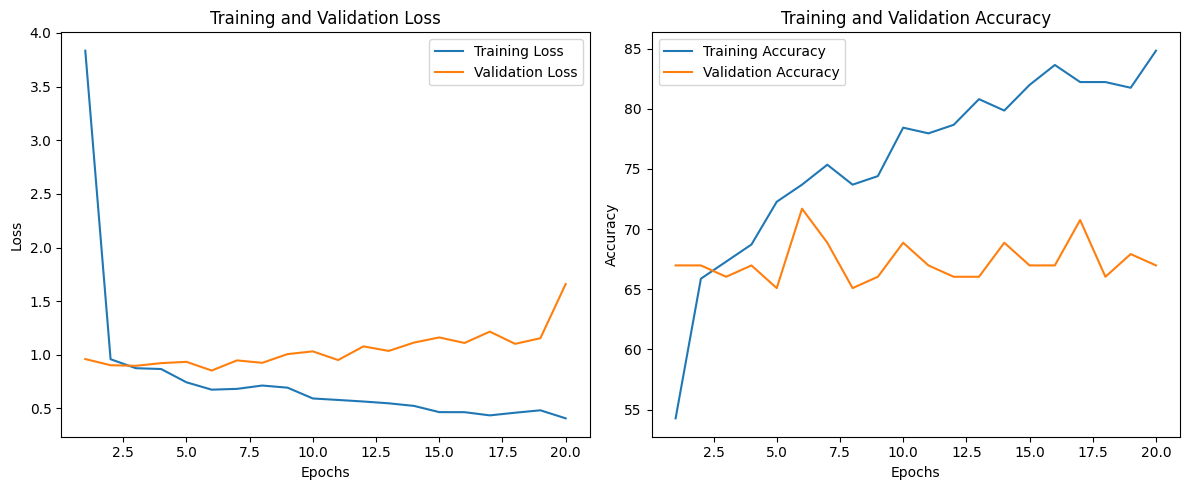

In [32]:
epochs = range(1, num_epochs + 1)

# Plotting training and validation losses
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(epochs, val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting training and validation accuracies
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Training Accuracy')
plt.plot(epochs, val_accuracies, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## Evaluation

In [33]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

all_labels = np.concatenate([y_train, y_test])

label_encoder = LabelEncoder()
label_encoder.fit(np.unique(all_labels))

y_test_encoded = label_encoder.transform(y_test)

In [34]:
model.eval()

y_pred = []

with torch.no_grad():
    for inputs, _ in test_loader:
        inputs = inputs.unsqueeze(1).to(device)
        outputs = model(inputs)

        # Get the highest prob.
        _, predicted = torch.max(outputs, 1)
        y_pred.extend(predicted.cpu().numpy())

print(classification_report(y_test_encoded, y_pred))

              precision    recall  f1-score   support

           0       0.70      1.00      0.83        19
           1       0.25      0.25      0.25         4
           2       0.00      0.00      0.00         9
           3       0.50      0.23      0.32        30
           4       0.66      0.82      0.73        71

    accuracy                           0.64       133
   macro avg       0.42      0.46      0.42       133
weighted avg       0.57      0.64      0.59       133



/home/matcraft/anaconda3/envs/math/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/matcraft/anaconda3/envs/math/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/matcraft/anaconda3/envs/math/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

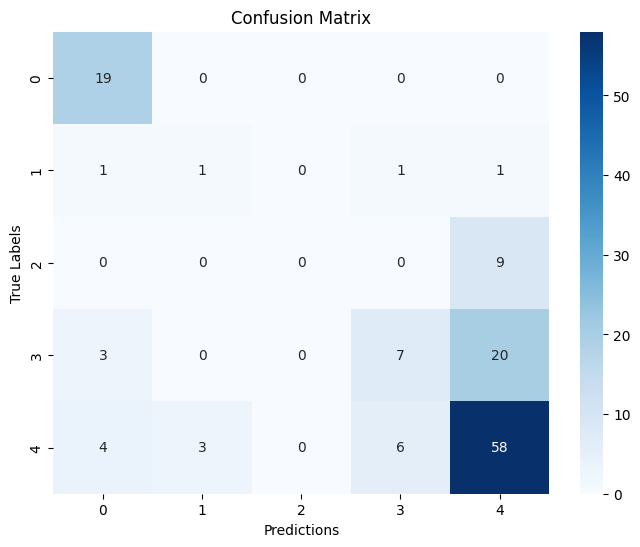

In [36]:
conf_matrix = confusion_matrix(y_test_encoded, y_pred)

# Obtiene las etiquetas originales directamente
original_labels = label_encoder.classes_

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', 
            xticklabels=original_labels, yticklabels=original_labels)
plt.xlabel('Predictions')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [37]:
from sklearn.metrics import classification_report

class_labels_str = [str(label) for label in original_labels]

report = classification_report(y_test_encoded, y_pred, target_names=class_labels_str)
print(report)

              precision    recall  f1-score   support

           0       0.70      1.00      0.83        19
           1       0.25      0.25      0.25         4
           2       0.00      0.00      0.00         9
           3       0.50      0.23      0.32        30
           4       0.66      0.82      0.73        71

    accuracy                           0.64       133
   macro avg       0.42      0.46      0.42       133
weighted avg       0.57      0.64      0.59       133



/home/matcraft/anaconda3/envs/math/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/matcraft/anaconda3/envs/math/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/matcraft/anaconda3/envs/math/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

In [38]:
# prediction_probabilities_2d = np.vstack((1 - prediction_probabilities, prediction_probabilities)).T

# import scikitplot as skplt

# # Cumulative Gain Curve
# skplt.metrics.plot_cumulative_gain(y_test_encoded, prediction_probabilities_2d)
# plt.show()

# # Lift Curve
# skplt.metrics.plot_lift_curve(y_test_encoded, prediction_probabilities_2d)
# plt.show()